In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [ ]:
pd.notna(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [ ]:
s = pd.Series([1,2,3,np.nan,np.nan,4])

pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
pd.notnull(s).sum()

4

In [ ]:
pd.isnull(s).sum()

2

In [ ]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [ ]:
s.isna()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
s.notna()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
s[s.notna()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [ ]:
s.dropna()

s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
df = pd.DataFrame({
    'Column A' : [1, np.nan, 30, np.nan],
    'Column B' : [2, 8, 31, np.nan],
    'Column C' : [np.nan, 9, 32, 100],
    'Column D' : [5, 8, 34, 110]
})

df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
df.shape

(4, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [ ]:
df.isna().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

In [ ]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
df.dropna(how='any')

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [ ]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [ ]:
df.dropna(thresh=3, axis=1)

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [ ]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [ ]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

**INVALID DATA CLEANING**

In [ ]:
d = pd.DataFrame({
    'sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25]
})

d

,sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [ ]:
#this can be used to check fior invalid values in the table
d['sex'].unique() #Identifies the various unique element in the array

array(['M', 'F', 'D', '?'], dtype=object)

In [ ]:
#Value_count method can also be used to identify outliers
d['sex'].value_counts() #this shows how many of the values are invalid

F    2
?    1
D    1
M    1
Name: sex, dtype: int64

In [ ]:
#the replace method can be use to change the invalid value
d['sex'].replace({'D':'F', 'N':'M'})

0    M
1    F
2    F
3    F
4    ?
Name: sex, dtype: object

In [ ]:
#a replace function can also be created

d.replace({
    'sex':{
        'D': 'F',
        'N': 'M'
    },
    'Age':{
        290: 29
    }
})

,sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In [ ]:
#in other to remove all extra 0s like 290 is 29
d.loc[d['Age']>100, 'Age'] = d.loc[d['Age']>100, 'Age']/10

d

,sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


**DUPLICATES REMOVAL**

In [ ]:
ambassadors = pd.Series([
                         'France',
                         'UK',
                         'UK',
                         'Italy',
                         'Germany',
                         'Germany',
                         'Germany'
], index=[
          'Gerard Araud',
          'Kim Darouch',
          'Peter Westmacott',
          'Armando Varriccho',
          'Peter Witig',
          'Peter Ammon',
          'Klaus Sacrioth'
])

In [ ]:
ambassadors

Gerard Araud          France
Kim Darouch               UK
Peter Westmacott          UK
Armando Varriccho      Italy
Peter Witig          Germany
Peter Ammon          Germany
Klaus Sacrioth       Germany
dtype: object

In [ ]:
ambassadors.duplicated()

Gerard Araud         False
Kim Darouch          False
Peter Westmacott      True
Armando Varriccho    False
Peter Witig          False
Peter Ammon           True
Klaus Sacrioth        True
dtype: bool

In [ ]:
ambassadors.duplicated(keep='last')

Gerard Araud         False
Kim Darouch           True
Peter Westmacott     False
Armando Varriccho    False
Peter Witig           True
Peter Ammon           True
Klaus Sacrioth       False
dtype: bool

In [ ]:
ambassadors.duplicated(keep=False)

Gerard Araud         False
Kim Darouch           True
Peter Westmacott      True
Armando Varriccho    False
Peter Witig           True
Peter Ammon           True
Klaus Sacrioth        True
dtype: bool

In [ ]:
ambassadors.drop_duplicates(keep='last')

Gerard Araud          France
Peter Westmacott          UK
Armando Varriccho      Italy
Klaus Sacrioth       Germany
dtype: object

In [ ]:
ambassadors.drop_duplicates(keep=False)

Gerard Araud         France
Armando Varriccho     Italy
dtype: object

In [ ]:
players = pd.DataFrame({
                     'name':[
                             'Kobe Bryant',
          'LeBron James',
          'Kobe Bryant',
          'Camelo Anthony',
          'Kobe Bryant',

                     ], 'pos':[
                           'SG',
                           'SF',
                           'SG',
                           'SF',
                           'SF'    
                     ],

})

In [ ]:
players

,name,pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Camelo Anthony,SF
4,Kobe Bryant,SF


In [ ]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

HANDLING TEXT BY SPLITING COLUMN

In [ ]:
DF = pd.DataFrame({
    'Data':[
            '1987_M_US_1',
            '1990?_M_UK_1',
            '1992_F_US_2',
            '1970?_M_IT_1',
            '1985_F_I T_2'
    ]
})

In [ ]:
DF

,Data
0,1987_M_US_1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_IT_1
4,1985_F_I T_2


In [ ]:
#This method is used to separate txt having _
DF['Data'].str.split('_')

0     [1987, M, US, 1]
1    [1990?, M, UK, 1]
2     [1992, F, US, 2]
3    [1970?, M, IT, 1]
4    [1985, F, I T, 2]
Name: Data, dtype: object

In [ ]:
DF = DF['Data'].str.split('_', expand=True)
DF

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [ ]:
DF.columns = ['year', 'sex', 'Country', 'No of Children']

In [ ]:
DF

,year,sex,Country,No of Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [ ]:
DF['year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: year, dtype: bool

In [ ]:
#mthis is to check for blank spaces
DF['Country'].str.strip()

0     US
1     UK
2     US
3     IT
4    I T
Name: Country, dtype: object

In [ ]:
#close the blank space
DF['Country'].str.replace(' ','')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

DATA CLEANING AND VISUALISATION

In [ ]:
x = np.arange(-10, 11)

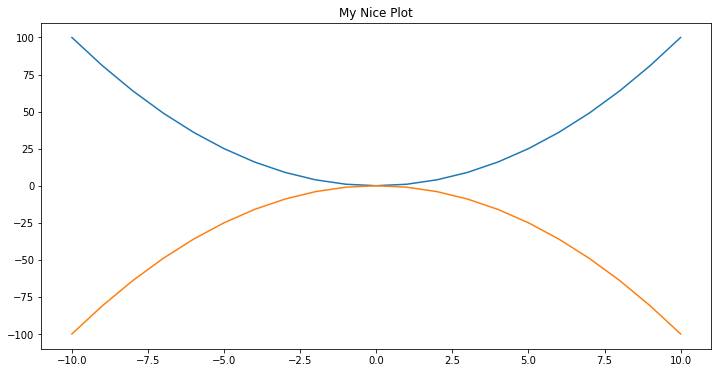

In [ ]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x**2)
plt.plot(x, -1*(x**2))

Text(0, 0.5, 'X-Squared')

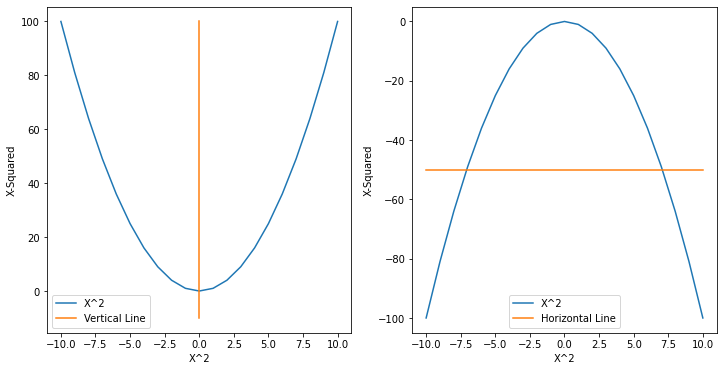

In [ ]:
#Dealing with subplot

plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)
plt.plot(x, x**2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X^2')
plt.ylabel('X-Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1*(x**2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['X^2', 'Horizontal Line'])
plt.xlabel('X^2')
plt.ylabel('X-Squared')